# Вступительное задание ЛШ DataScience 2017 – Покемоны

<i>В этом задании вам нужно провести статистический анализ приложенного датасета о покемонах. Мы даем вам свободу творчества в интерпретации неочевидных колонок, а также прикладываем 2 датасета с расшифровками abilities и egg_groups на случай, если вам будет интересно.
Анализ может быть любой (например, можно проверить гипотезу о том, что более высокие покемоны более счастливые, составить разбиение по необходимому опыту и способностям или кластеризовать виды покемонов), главное - чтобы это показало ваши умения работы с данными, программирования и оформления результата работы.
Ответ принимается в формате оформленного jupyter notebook с кодом, пояснениями, рассуждениями, выводами и, конечно же, красивыми картинками.</i>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv', index_col='id')
abilities = pd.read_csv('abilities.csv', index_col='id')
egg_groups = pd.read_csv('egg_groups.csv', index_col='id')

### Обзор данных

In [4]:
pokemon.head()

,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,kdex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
id,,,,,,,,,,,,,,,,,,,,,
1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,1.0,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,2.0,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,3.0,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,4.0,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,5.0,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


Поскольку первые семь колонок текстовые, на них смотреть особенно не будем. Можно, конечно, предположить, что названия покемонов как-то связаны с их характеристиками, но мы это сейчас проверять не будем.

Посмотрим на основные статистики.

In [41]:
pokemon.ix[:,7:18].describe()

,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id,ability1_id
count,663.000000,663.000000,151.000000,256.000000,251.000000,205.000000,218.000000,158.000000,663.000000,306.000000,663.000000
mean,3.045249,328.033183,76.000000,128.500000,126.000000,102.970732,106.500000,77.879747,8.761689,7.372549,49.956259
std,1.480305,186.922901,43.734045,74.045031,72.601653,59.272874,60.730063,45.319581,4.785481,4.828036,35.719149
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
25%,2.000000,166.500000,38.500000,64.750000,63.500000,52.000000,53.250000,39.250000,5.000000,3.000000,26.000000
50%,3.000000,332.000000,76.000000,128.500000,126.000000,103.000000,107.500000,77.500000,10.000000,5.000000,46.000000
75%,4.000000,487.000000,113.500000,192.250000,188.500000,154.000000,156.750000,116.750000,12.000000,12.000000,66.000000
max,5.000000,649.000000,151.000000,256.000000,251.000000,202.000000,210.000000,155.000000,17.000000,17.000000,164.000000


In [43]:
pokemon.ix[:,19:28].describe()

,abilitydream_id,evolution_parent_pokemon_id,evolution_method_id,height,weight,gender_rate,catch_rate,exp_yield
count,571.000000,322.000000,321.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,93.798599,299.170807,3.420561,11.490196,577.039216,3.022624,98.920060,141.375566
std,48.034451,188.771843,4.426562,10.543944,927.302988,2.126889,76.800668,59.858184
min,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,3.000000,20.000000
25%,50.000000,133.000000,1.000000,6.000000,99.000000,1.000000,45.000000,83.000000
50%,102.000000,284.000000,1.000000,10.000000,288.000000,4.000000,60.000000,145.000000
75%,135.000000,450.500000,6.000000,14.000000,609.000000,4.000000,175.000000,187.500000
max,161.000000,636.000000,22.000000,145.000000,9500.000000,8.000000,255.000000,390.000000


In [46]:
pokemon.ix[:,29:37].describe()

,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
count,663.000000,175.000000,663.000000,9.000000,663.000000,6.630000e+02,663.000000,505.000000
mean,6.452489,7.908571,0.027149,280.111111,27.669683,1.053326e+06,333.441931,253.019802
std,4.329735,3.586803,0.162641,27.624466,24.401434,1.686685e+05,193.035763,145.957973
min,1.000000,2.000000,0.000000,231.000000,5.000000,6.000000e+05,1.000000,1.000000
25%,3.000000,5.000000,0.000000,291.000000,20.000000,1.000000e+06,166.500000,127.000000
50%,5.000000,7.000000,0.000000,293.000000,20.000000,1.000000e+06,332.000000,253.000000
75%,10.000000,10.000000,0.000000,295.000000,25.000000,1.059860e+06,500.500000,379.000000
max,15.000000,14.000000,1.000000,297.000000,120.000000,1.640000e+06,667.000000,505.000000


In [6]:
abilities.head()

,identifier,name,name_jp,name_jp_tm,generation_id,color_id
id,,,,,,
1,stench,Stench,あくしゅう,Stench,3,4
2,drizzle,Drizzle,あめふらし,Rainfall,3,11
3,speed-boost,Speed Boost,かそく,Acceleration,3,23
4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6
5,sturdy,Sturdy,がんじょう,Sturdy,3,6


In [9]:
egg_groups

,identifier,name,name_jp,list_order,legacy_id
id,,,,,
1,monster,Monster,かいじゅう,2,9
2,water-1,Water 1,すいちゅう１,8,11
3,bug,Bug,むし,3,1
4,flying,Flying,ひこう,4,4
5,ground,Ground,りくじょう,5,5
6,fairy,Fairy,ようせい,6,3
7,plant,Plant,しょくぶつ,7,10
8,humanshape,Humanshape,ひとがた,11,6
9,water-3,Water 3,すいちゅう３,10,13


Самые частые значения на всякий случай.

In [62]:
pokemon.mode(axis=0).ix[:, 7:20]

,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id,ability1_id,ability2_id,abilitydream_id
0,5.0,479.0,NaN,NaN,NaN,202.0,152.0,61.0,11.0,3.0,26.0,5.0,125.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,75.0,NaN


In [63]:
pokemon.mode(axis=0).ix[:, 21:30]

,evolution_method_id,evolution_parameter,height,weight,gender_rate,catch_rate,exp_yield,base_happiness,egg_group1_id
0,1.0,30,6.0,3.0,4.0,45.0,61,70.0,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN


In [64]:
pokemon.mode(axis=0).ix[:, 31:37]

,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,0.0,NaN,20.0,1000000.0,NaN,499.0
1,NaN,NaN,NaN,NaN,NaN,NaN


Собственно лист фичей, чтобы на него было удобно смотреть.

In [10]:
list(pokemon)

['identifier',
 'name',
 'name_phonetic',
 'species',
 'name_jp',
 'name_jp_romaji',
 'species_jp',
 'generation_id',
 'ndex',
 'kdex',
 'jdex',
 'jdex_old',
 'hdex',
 'sdex',
 'udex',
 'type1_id',
 'type2_id',
 'ability1_id',
 'ability2_id',
 'abilitydream_id',
 'evolution_parent_pokemon_id',
 'evolution_method_id',
 'evolution_parameter',
 'height',
 'weight',
 'gender_rate',
 'catch_rate',
 'exp_yield',
 'base_happiness',
 'egg_group1_id',
 'egg_group2_id',
 'is_baby',
 'baby_breed_item_id',
 'hatch_counter',
 'lvl_100_exp',
 'pokemon_order',
 'legacy_id']

Посмотрим на распределения значений. Сначала на категориальные/порядковые.

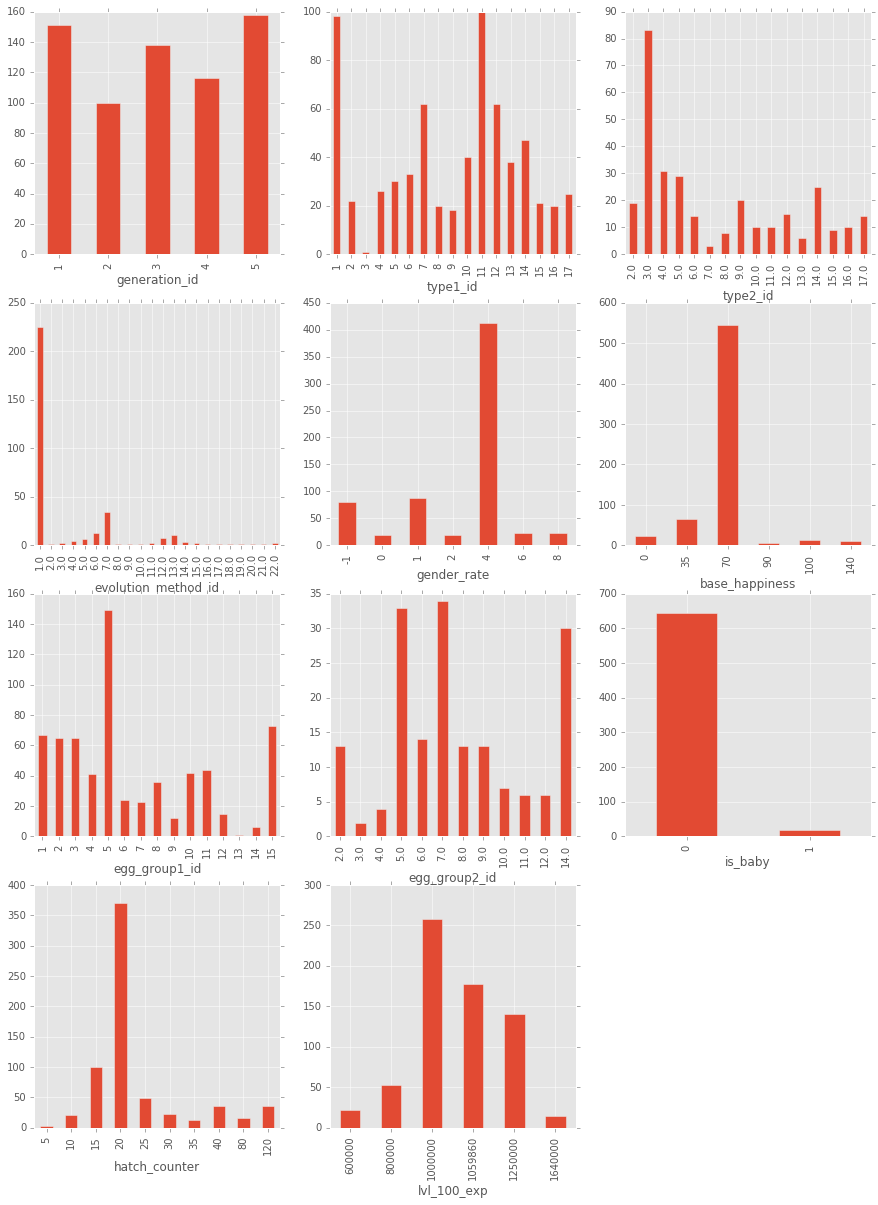

In [65]:
bar_graph = [7, 15, 16, 21, 25, 28, 29, 30, 31, 33, 34]
j = 1
for i in bar_graph:
    plt.subplot(4,3,j)
    pokemon.groupby(list(pokemon)[i]).size().plot(kind='bar', figsize=(15,20))
    j += 1

Получаем какие-то более или менее осмысленные распределения:
* Всего пять поколений и они представлены как минимум 100 покемонами.
* Есть какие-то типы 1 и 2. Второй тип есть не у всех. Преобладает среди первого типа 1 и 11, среди второго – 3.
* Есть 22 метода эволюции (что бы это ни было). Преобладает метод 1.
* Есть непонятная метрика пола от -1 до 8, больше всего 4.
* Есть совсем несчастные покемоны((( В основном уровень счастья 70.
* Яйца, по-видимому, могут входить в группу. В первичной классификации больше всего яиц типа 5, во вторичной (которая есть не у всех) – 5, 7, 14. 
* Подавляющее большинство покемонов не дети (не детеныши?).
* Какой-то счетчик выводка/рождения/вылупливания. Больше всего показателя 20.
* Сколько нужно быллов, чтобы перейти на уровень 100? В любом случае, преобладает миллион.

Теперь посмотрим на переменные с более густыми распределениями.

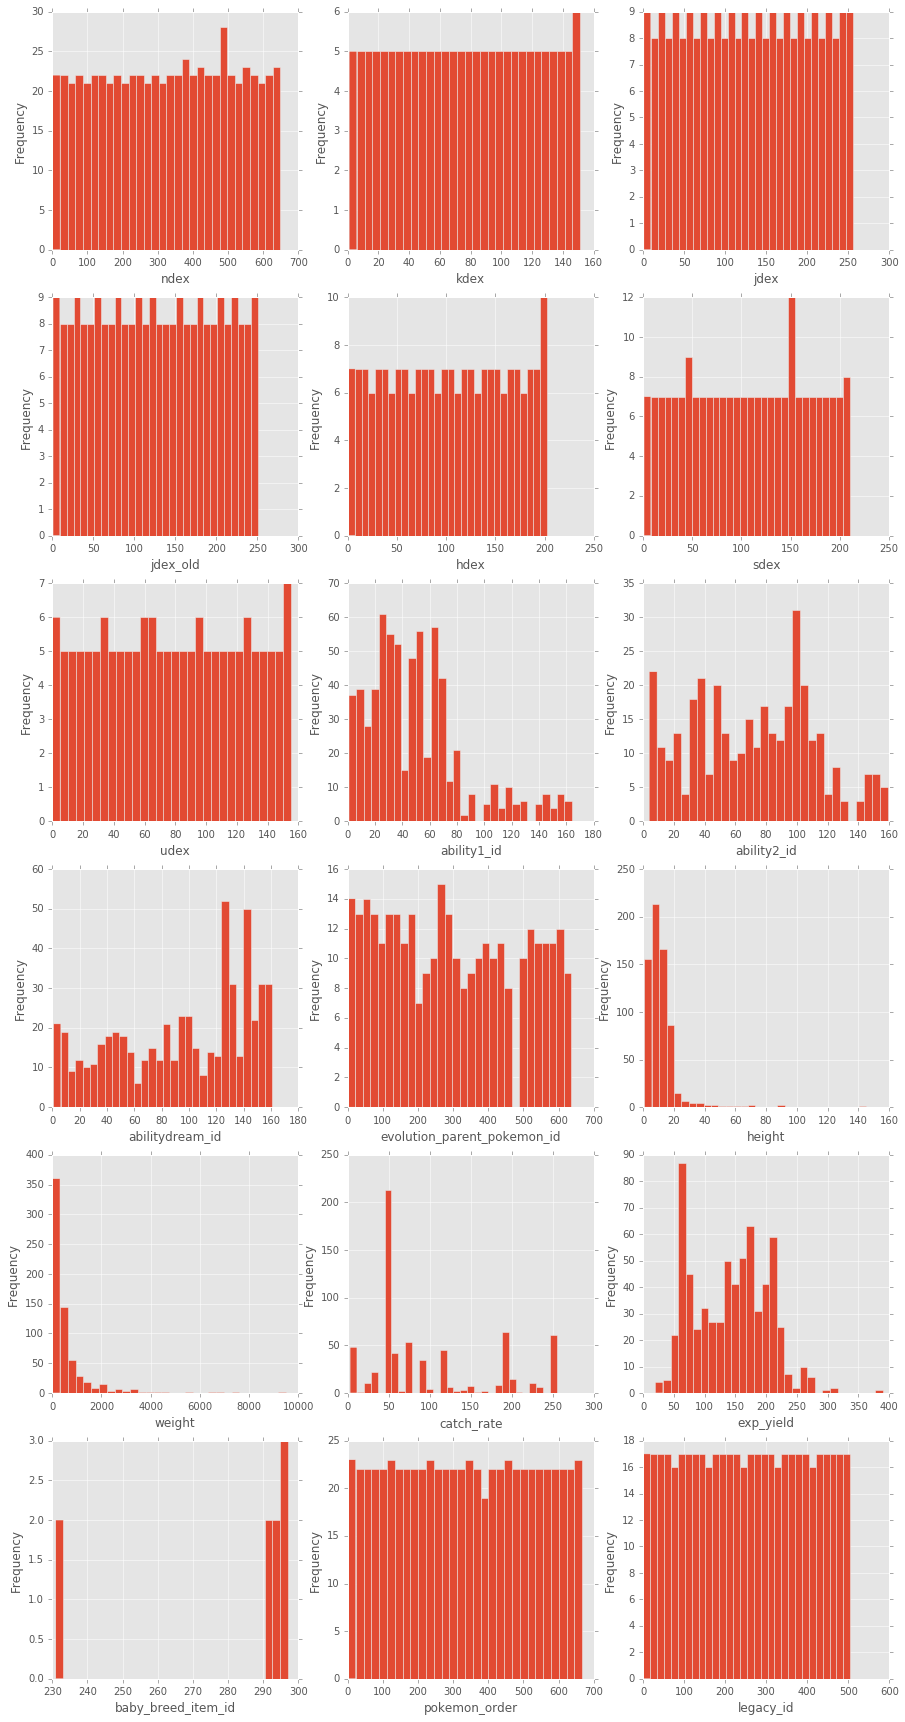

In [58]:
hist_graph = [8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 23, 24, 26, 27, 32, 35, 36]
j = 1
for i in hist_graph:
    plt.subplot(7,3,j)
    pokemon[list(pokemon)[i]].plot(kind='hist', bins=30, figsize=(15,35)).set_xlabel(list(pokemon)[i])
    j += 1

* ndex, kdex, jdex, jdex_old, hdex, sdex, udex, pokemon_order, legacy_id больше похожи на какие-то индексы, мало чем отличающиеся друг от друга. Распределение у них более или менее равномерное. Не будем-ка мы дальше на них смотреть.
* У покемонов есть первичная и вторичная (не у всех) способность. Многие левитируют (ability1_id=26). Может, abilitydream_id – это та способность, которую они хотят иметь? На графиках есть некоторое тяготение первой способности к началу списка, второй – к середине, abilitydream – к концу.
* По-видимому, покемоны, эволюционируя, могут менять вид?
* О, красивые распределения роста и веса. В основном покемоны, кажется, небольшие и нетяжелые (хотя единицы измерения неизвестны), но есть аутлаеры.
* Покемонов ловят, поэтому catch_rate – это какая-то средняя норма улова для вида, наверное. 
* Experience? expected? Кто знает? Но у покемонов есть какой-то выход/результат.
* Неизвестная штука про размножение, но она есть всего у 9 покемонов, так что не будем ее рассматривать.

### Корреляции
Посчитаем корреляции, просто чтобы были цифры, и визуализируем корреляционную матрицу.

In [68]:
import seaborn as sns

sns.set(context="paper", font="monospace")
corrmat = pokemon.ix[:,7:37].corr()
corrmat.ix[:,:10]

,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id
generation_id,1.000000,0.977474,NaN,0.013700,-0.025383,-0.060738,-0.085104,NaN,0.110276,0.114906
ndex,0.977474,1.000000,1.000000,0.276993,0.293600,0.210550,0.062300,1.000000,0.141676,0.162285
kdex,NaN,1.000000,1.000000,0.496372,0.498083,-0.002627,0.492036,NaN,0.216885,0.358611
jdex,0.013700,0.276993,0.496372,1.000000,0.999954,0.391159,0.495771,NaN,0.207367,0.258157
jdex_old,-0.025383,0.293600,0.498083,0.999954,1.000000,0.389104,0.488628,NaN,0.208671,0.262077
hdex,-0.060738,0.210550,-0.002627,0.391159,0.389104,1.000000,0.452176,NaN,0.192336,0.324142
sdex,-0.085104,0.062300,0.492036,0.495771,0.488628,0.452176,1.000000,NaN,0.180732,0.230261
udex,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.120028,0.162899
type1_id,0.110276,0.141676,0.216885,0.207367,0.208671,0.192336,0.180732,0.120028,1.000000,0.082632
type2_id,0.114906,0.162285,0.358611,0.258157,0.262077,0.324142,0.230261,0.162899,0.082632,1.000000


In [71]:
corrmat.ix[:,10:17]

,ability1_id,ability2_id,abilitydream_id,evolution_parent_pokemon_id,evolution_method_id,height,weight
generation_id,0.392799,0.299529,0.009352,0.883370,-0.066736,-0.052910,0.054206
ndex,0.381890,0.309012,0.016903,0.898560,-0.032468,-0.005909,0.112397
kdex,-0.136856,-0.050700,0.129908,0.681979,0.148886,0.220653,0.268325
jdex,0.041333,0.085865,-0.085807,0.251497,0.098339,0.089116,0.257850
jdex_old,0.045895,0.090324,-0.079645,0.250099,0.070725,0.082585,0.245833
hdex,-0.219968,0.238983,0.027590,0.087078,0.126523,0.138744,0.243583
sdex,-0.221878,0.125480,0.072347,-0.212427,0.262516,0.064870,0.172845
udex,0.134957,-0.000731,-0.103754,1.000000,-0.001793,0.251850,0.297464
type1_id,0.063585,-0.091198,-0.135218,0.116421,-0.089212,0.045279,0.005258
type2_id,-0.191912,0.047487,-0.011704,0.172980,-0.037484,0.043335,0.212322


In [74]:
corrmat.ix[:,17:24]

,gender_rate,catch_rate,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby
generation_id,-0.054541,-0.038646,0.092684,-0.051843,0.098145,0.136242,-0.005110
ndex,-0.096956,-0.099100,0.157527,-0.108438,0.185257,0.207524,-0.004601
kdex,-0.259163,-0.316588,0.331256,-0.232906,0.344966,0.266413,NaN
jdex,-0.241855,-0.387965,0.329365,-0.303853,0.051628,0.303998,-0.082329
jdex_old,-0.245770,-0.385218,0.324879,-0.307743,0.056763,0.304040,-0.081072
hdex,-0.152702,-0.228238,0.298297,-0.319659,0.357910,0.262906,0.056137
sdex,-0.195913,-0.198504,0.257544,-0.172305,0.197420,0.179417,0.049721
udex,-0.120314,-0.259342,0.265212,-0.371169,0.410516,0.493754,NaN
type1_id,-0.097570,-0.132278,0.087920,-0.234224,0.118579,0.175559,-0.049899
type2_id,-0.070645,-0.069076,0.083171,-0.122826,0.159327,-0.154738,-0.007691


In [78]:
corrmat.ix[:,24:29]

,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
generation_id,0.997663,0.099526,0.037003,0.932187,0.965812
ndex,0.913012,0.200186,0.078503,0.951586,0.999909
kdex,NaN,0.488718,0.338886,0.997411,1.000000
jdex,NaN,0.495034,0.340827,0.320824,0.276224
jdex_old,NaN,0.499085,0.342589,0.321347,0.293600
hdex,1.000000,0.495166,-0.001432,0.194612,0.210930
sdex,-0.354418,0.253298,0.068085,-0.123250,0.062755
udex,NaN,0.478904,0.466265,0.999941,NaN
type1_id,0.074316,0.172784,0.190448,0.146757,0.130812
type2_id,1.000000,0.126891,0.072812,0.174990,0.249683


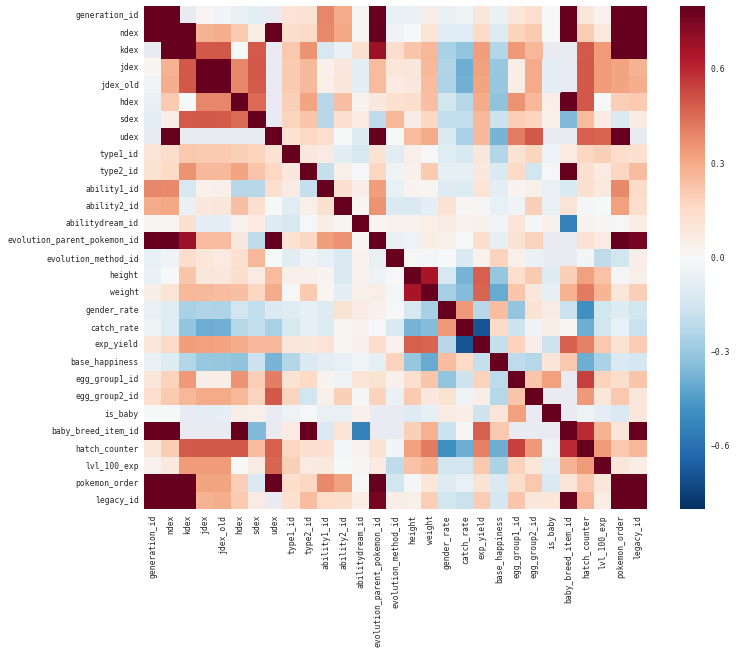

In [79]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Будем в основном смотреть на коэффициенты корреляции по модулю большие 0.5.
* У generation_id очень сильная корреляция со всякими "индексами" (ndex, pokemon_order, legacy_id), а также с evolution_parent_pokemon_id и baby_breed_item_id. Это значит, что по-видимому, придумываются новые поколения покемонов, заносятся в базу – у них появляются новые индексы. Процесс довольно линейный. Последние две фичи, хотя не особо понятные, практически линейно получаются из поколения и индекса, а значит новой информации несут не много.
* Остальные индексы (kdex, jdex, jdex_old, hdex, sdex, udex) ведут себя в принципе похоже, еще иногда сильно коррелируя между собой. У некоторых корреляция приближается к 0.5 с hatch_counter, у udex – еще с egg_group2_id lvl_100_exp.
* У типов покемонов ничего интересного вроде нет, кроме того, что тип 2 коррелирует с baby_breed_item_id с коэффициентом 1.00. Вспомним, что этот baby_breed_item есть только у 9 покемонов. Посмотрим, в чем прикол.

In [89]:
pokemon.loc[pokemon['baby_breed_item_id'] > 0]['type2_id']

id
298    NaN
360    NaN
406    4.0
433    NaN
438    NaN
439    NaN
440    NaN
446    NaN
458    3.0
Name: type2_id, dtype: float64

Понятно. Ничего интересного. Продолжим смотреть на корреляционную матрицу:
* У способностей коэффициент корреляции приближается к 0.4 с поколением, evolution_parent, первым индексом и pokemon_order. Это, наверное, тоже можно объяснить тем, что придумывали новых покемонов, а заодно и новые способности. В abilitydream ничего интересного, кроме сильной отрицательной корреляции с baby_breed, но там скорее всего та же хрень, что с типом 2 выше.
* Вес, как ни странно, коррелирует с ростом (0,66). 
* Ок, я зашла на бульбапедию и вроде нашла, что такое exp_yield. Это что-то типа экпериенса, который получает покемон при поражении другого покемона в схватке. Тогда логично, что чем больше (выше и тяжелее) покемон, тем, наверное, его сложнее победить и тем больше экспериенса получает покемон, его победивший. От этого корреляция между этими параметрами приближается к 0.5. Ну и тем сложнее его поймать, поэтому с catch_rate сильная отрицательная корреляция (-0.68).
* Счастье ни с чем особо не коррелирует. Отвечая на предложенный вопрос, нет, более высокие (и более тяжелые) покемоны не более счастливые, скорее наоборот (-0.3 и -0.4).
* hatch_counter немного коррелирует с индексами и, по-видимому, как-то связан с gender_rate (-0.49) и egg_group1 (0.55).

Дальше можно, например, обучить классификатор, чтобы он предсказывал тип покемона по разным параметрам, или, как в задании, кластеризовать по каким-то фичам, но на это у меня пока времени не хватило.